# 0.0 - Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import numpy as np

/home/aderaldo/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1.0 - Load Dataset

In [3]:
# path
'/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_training.csv'

'/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_training.csv'

## 1.1 - Training Dataset

In [4]:
df1 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_training.csv')

In [5]:
df2 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/y_training.csv')

## 1.2 - Test Dataset

In [6]:
df3 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_test.csv')

In [7]:
df4 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/y_test.csv')

## 1.3 - Validation Dataset

In [8]:
df5 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/X_validation.csv')

In [9]:
df6 = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/fundamentos_de_machine_learning/projeto/Datasets/classificação/y_validation.csv')

## 1.4 - Feature Selection

In [41]:
df5.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,75635,1,0.525641,1.0,0.714055,1.0,1.0,1.0,1.0,0.8,...,0.75,0.75,0.8,0.8,0.000000,0.000000,0.0,1.0,1.0,0.0
1,106136,1,0.615385,1.0,0.054725,0.4,1.0,1.0,1.0,0.4,...,0.25,0.00,0.4,0.6,0.004916,0.004946,0.0,1.0,1.0,0.0
2,94469,1,0.435897,1.0,0.342690,0.0,0.2,0.2,0.6,0.8,...,0.25,0.75,0.4,0.6,0.004916,0.000000,1.0,0.0,1.0,0.0
3,42104,1,0.615385,1.0,0.649838,1.0,1.0,0.6,1.0,1.0,...,0.75,0.75,0.8,0.8,0.000000,0.000989,1.0,0.0,1.0,0.0
4,78762,1,0.282051,0.0,0.100363,0.4,0.6,0.6,0.6,0.4,...,0.75,0.75,0.6,0.4,0.093412,0.090010,0.0,1.0,1.0,0.0


In [10]:
features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

In [11]:
x_train = df1.loc[:, features]

In [12]:
y_train = df2['0'].values

In [13]:
x_test = df3.loc[:, features]

In [14]:
y_test = df4['0'].values

In [15]:
x_val = df5.loc[:, features]

In [16]:
y_val = df6['0'].values

In [17]:
x_test.shape

(25893, 24)

In [19]:
# verificar o balanceamento 
df4.loc[:,'0'].value_counts( normalize = True)

0    0.561078
1    0.438922
Name: 0, dtype: float64

# 2.0 - Training

## 2.1 - Fine Tunning

In [49]:
# Realizando a escolha do melhor parametro avaliando a perfomance com os dados de validação
k_list = np.arange(3, 22, 2)
accuracy_list = []

for i in k_list:
    print(f'K Number: {i}')
    knn_classifier = KNeighborsClassifier( n_neighbors = i )
    knn_classifier.fit( x_train, y_train )
    y_pred = knn_classifier.predict( x_val )
    accuracy = mt.accuracy_score( y_val, y_pred )
    print(f'Accuracy: {accuracy} \n')
    accuracy_list.append(accuracy)

K Number: 3
Accuracy: 0.9235174876926542 

K Number: 5
Accuracy: 0.9252228192670292 

K Number: 7
Accuracy: 0.9254158756716754 

K Number: 9
Accuracy: 0.9260272209530551 

K Number: 11
Accuracy: 0.9260915730879372 

K Number: 13
Accuracy: 0.9264776858972297 

K Number: 15
Accuracy: 0.9265098619646707 

K Number: 17
Accuracy: 0.9257054602786448 

K Number: 19
Accuracy: 0.925962868818173 

K Number: 21
Accuracy: 0.9251262910647061 



In [61]:
k_accuracy = { 'k': k_list, 'accuracy': accuracy_list}
k_accuracy_dataframe = pd.DataFrame(k_accuracy)


k           21.00000
accuracy     0.92651
dtype: float64

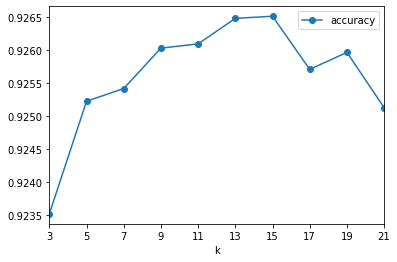

In [62]:
fig, ax = plt.subplots()
k_accuracy_dataframe.plot(x="k", y="accuracy", marker="o", ax=ax)
ax.set_xlim(3,21)
ax.set_xticks(np.arange(3, 22, 2));

## 2.4 Houldout Validation

In [20]:
# Algoritmo treinado com os melhores valores
knn_classifier = KNeighborsClassifier( n_neighbors = 15 )
knn_classifier.fit( np.concatenate( (x_train, x_val) ), np.concatenate((y_train, y_val)) )

# Estimando o erro de generalização com os dados de test
y_pred_final = knn_classifier.predict( x_test )
accuracy = mt.accuracy_score( y_test, y_pred_final )

/home/aderaldo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [71]:
print(f'Accuracy: {accuracy} \n')

Accuracy: 0.9283976364268335 



## 2.2 Performance Over Training Dataset

In [ ]:
y_pred = knn_classifier.predict( x_train )
accuracy = mt.accuracy_score( y_train, y_pred )
print(f'Accuracy: {accuracy} \n')

/home/aderaldo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## 2.2 Performance Over Test Dataset

In [73]:
# Performance
y_pred_test = knn_classifier.predict( x_test )
accuracy = mt.accuracy_score( y_test, y_pred_test )
print(f'Accuracy: {accuracy} \n')

/home/aderaldo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9283976364268335 



## 2.3 Performance Over Validation Dataset

In [21]:
# Performance
y_pred_val = knn_classifier.predict( x_val )
accuracy = mt.accuracy_score( y_val, y_pred_val )
print(f'Accuracy: {accuracy} \n')

/home/aderaldo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9339103574761093 



# 3.0 - Metrics

## 3.1 - Training

In [30]:
mt.precision_score(y_train, y_pred)

0.9731907070031757

In [27]:
mt.recall_score(y_train, y_pred)

0.9263395698103601

In [ ]:
mt.f1_score( y_train, y_pred )

## 3.2 - Test

In [37]:
mt.precision_score(y_test, y_pred_test)

0.942714702285768

In [38]:
mt.recall_score(y_test, y_pred_test)

0.8818301803783546

In [ ]:
mt.f1_score(y_test, y_pred_test)

## 3.3 - Validation

In [22]:
mt.precision_score(y_val, y_pred_val)

0.9633839408946984

In [24]:
mt.recall_score(y_val, y_pred_val)

0.8809859677778603

In [26]:
mt.f1_score( y_val, y_pred_val )

0.9203443729155356